In [0]:
## Importing standard libraries

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt


In [0]:
## Importing sklearn libraries

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
## Keras Libraries for Neural Networks

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD

Using TensorFlow backend.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
## Read data from the CSV file

train = pd.read_csv('train.csv')
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.062500,0.000000,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.000000,0.0,0.053711,0.036133,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.0,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.0,0.015625,0.000000,0.009766,0.001953,0.009766,0.009766,0.015625,0.005859,0.000000,0.017578,0.007812,0.005859,0.009766,0.019531,0.042969,...,0.000977,0.000000,0.000977,0.003906,0.035156,0.015625,0.027344,0.000000,0.000000,0.008789,0.015625,0.0,0.000000,0.011719,0.000977,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.000000,0.0,0.000977,0.000000,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,0.001953,0.019531,0.001953,0.003906,0.035156,0.0,0.005859,0.000000,0.001953,0.003906,0.039062,0.009766,0.0,0.009766,0.005859,0.027344,0.001953,0.017578,0.003906,0.021484,0.027344,0.027344,0.000000,0.003906,0.011719,0.003906,0.005859,0.044922,...,0.005859,0.019531,0.124020,0.000000,0.017578,0.000977,0.016602,0.009766,0.006836,0.000977,0.005859,0.0,0.000977,0.001953,0.096680,0.016602,0.126950,0.000000,0.036133,0.055664,0.000000,0.001953,0.027344,0.000000,0.006836,0.017578,0.004883,0.0,0.006836,0.022461,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,0.001953,0.044922,0.041016,0.011719,0.041016,0.0,0.009766,0.015625,0.011719,0.007812,0.021484,0.000000,0.0,0.000000,0.015625,0.009766,0.001953,0.017578,0.041016,0.005859,0.021484,0.013672,0.017578,0.000000,0.005859,0.009766,0.027344,0.083984,...,0.000000,0.000000,0.040039,0.005859,0.005859,0.000000,0.003906,0.000000,0.000000,0.110350,0.000000,0.0,0.000000,0.087891,0.023

In [0]:
x_train = train.drop(['id', 'species'], axis=1).values
le = LabelEncoder().fit(train['species'])
y_train = le.transform(train['species'])

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

In [7]:
## We will be working with categorical crossentropy function
## It is required to further convert the labels into "one-hot" representation

y_cat = to_categorical(y_train)
print(y_cat.shape)

(990, 99)


In [8]:
## Hyperparameters

filename = '60_ep_drop_0.7'
learning_rate = 0.01
momentum = 0.8
decay = 0.0
batch_size = 128
epochs = 60
dropout = 0.7

print("Hyperparameters:")
print("="*25)
print("learning_rate: ", learning_rate)
print("momentum: ", momentum)
print("decay: ", decay)
print("batch size: ", batch_size)
print("no. epochs: ", epochs)
print("dropout: ", dropout)
print("-"*25)
print()


Hyperparameters:
learning_rate:  0.01
momentum:  0.8
decay:  0.0
batch size:  128
no. epochs:  60
dropout:  0.7
-------------------------



In [9]:
## Developing a layered model for Neural Networks
## Input dimensions should be equal to the number of features
## We used softmax layer to predict a uniform probabilistic distribution of outcomes

model = Sequential()
model.add(Dense(2048,input_dim=192,  init='uniform', activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(99, activation='softmax'))

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay, nesterov=False) ## Error is measured as categorical crossentropy or multiclass logloss
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics = ["accuracy"])

summary = str(model.summary())
print(summary)
print()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              395264    
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 99)                101475    
Total params: 2,594,915
Trainable params: 2,594,915
Non-trainable params: 0
_________________________________________________________________
None



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2048, input_dim=192, activation="relu", kernel_initializer="uniform")`
  


In [10]:
## Fitting the model on the whole training data

history = model.fit(x_train,y_cat,batch_size=batch_size,
                    nb_epoch=epochs,verbose=1, validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 891 samples, validate on 99 samples
Epoch 1/60
891/891 [==============================] - 1s 658us/step - loss: 5.1168 - accuracy: 0.0112 - val_loss: 4.5098 - val_accuracy: 0.0505
Epoch 2/60
891/891 [==============================] - 0s 508us/step - loss: 4.7528 - accuracy: 0.0180 - val_loss: 4.2445 - val_accuracy: 0.1818
Epoch 3/60
891/891 [==============================] - 0s 490us/step - loss: 4.4831 - accuracy: 0.0494 - val_loss: 4.0126 - val_accuracy: 0.2929
Epoch 4/60
891/891 [==============================] - 0s 499us/step - loss: 4.2785 - accuracy: 0.0617 - val_loss: 3.8154 - val_accuracy: 0.3434
Epoch 5/60
891/891 [==============================] - 0s 508us/step - loss: 4.0555 - accuracy: 0.0943 - val_loss: 3.6203 - val_accuracy: 0.4747
Epoch 6/60
891/891 [==============================] - 0s 503us/step - loss: 3.7482 - accuracy: 0.1504 - val_loss: 3.4093 - val_accuracy: 0.5556
Epoch 7/60
891/891 [==============================] - 0s 513us/step - loss: 3.5191 - accura

In [0]:
## Writing file with report

out = open(filename + 'report.txt','w')
out.write('Hyperparameters')
out.write('\n')
out.write('='*25)
out.write('\n')
out.write('\n')
out.write("learning_rate: {0}".format(learning_rate))
out.write('\n')
out.write("momentum: {0}".format(momentum))
out.write('\n')
out.write("decay: {0}".format(decay))
out.write('\n')
out.write("batch size: {0}".format(batch_size))
out.write('\n')
out.write("no. epochs: {0}".format(epochs))
out.write('\n')
out.write("dropout: {0}".format(dropout))
out.write('\n')
out.write("-"*25)
out.write('\n')
out.write('\n')
out.write(summary)
out.write('\n')
out.write('\n')
out.write('val_acc: {0}'.format(max(history.history['val_accuracy'])))
out.write('\n')
out.write('val_loss: {0}'.format(min(history.history['val_loss'])))
out.write('\n')
out.write('train_acc: {0}'.format(max(history.history['accuracy'])))
out.write('\n')
out.write('train_loss: {0}'.format(min(history.history['loss'])))
out.write('\n')
out.write("train/val loss ratio: {0}".format(min(history.history['loss'])/min(history.history['val_loss'])))
out.close()

In [12]:
## We need to consider the loss for final submission to leaderboard
## print(history.history.keys())

print('val_acc: ',max(history.history['val_accuracy']))
print('val_loss: ',min(history.history['val_loss']))
print('train_acc: ',max(history.history['accuracy']))
print('train_loss: ',min(history.history['loss']))

print()
print("train/val loss ratio: ", min(history.history['loss'])/min(history.history['val_loss']))

val_acc:  1.0
val_loss:  0.09809628129005432
train_acc:  0.9506173
train_loss:  0.281507890934896

train/val loss ratio:  2.8697101177823874


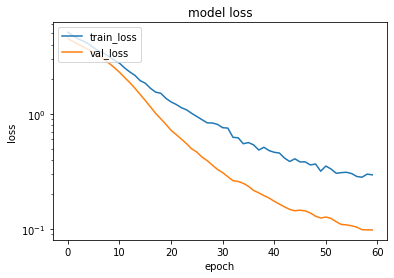

In [13]:
# summarize history for loss
## Plotting the loss with the number of iterations

plt.figure()
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.savefig(filename + "_loss"+".png")
#plt.show()

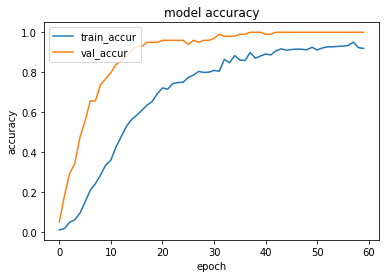

In [14]:
## Plotting the error with the number of iterations
## With each iteration the error reduces smoothly

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accur', 'val_accur'], loc='upper left')
plt.savefig(filename + "_error" + ".png")
#plt.show()

In [0]:
## Read test file

test = pd.read_csv('test.csv')
index = test.pop('id')
test = StandardScaler().fit(test).transform(test)
yPred = model.predict_proba(test)

In [0]:
## Converting the test predictions in a dataframe as depicted by sample submission

submission = pd.DataFrame(yPred, index=index, columns=le.classes_)
submission.to_csv(filename + '.csv')